# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("ggplot")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335478 entries, 0 to 2335477
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21081
Address                             12
Zip Code                         14491
Council District                 47550
APD Sector                        9227
APD District                      9712
PRA                              11002
Census Tract                    497514
Clearance Status                610532
Clearance Date                  341339
UCR Category                   1537416
Category Description           1537416
X-coordinate                     10403
Y-coordinate                     10403
Latitude                         39568
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2335473,20143631822,FAMILY DISTURBANCE,3400,N,12/29/2014 11:41:00 PM,12/29/2014,2341.0,12/29/2014 11:41:00 PM,12/29/2014,2341.0,RESIDENCE / HOME,109 MASTERSON PASS,78753.0,4.0,ED,1,240,18.23,N,01/02/2015,NaN,NaN,3130776.0,3130776.0,30.369795,-97.687855,"(30.36979494, -97.68785533)"
2335474,20191270738,THEFT BY SHOPLIFTING,607,N,05/07/2019 10:50:00 AM,05/07/2019,1050.0,05/07/2019 11:31:00 AM,05/07/2019,1131.0,DEPARTMENT / DISCOUNT STORE,11423 N LAMAR BLVD,78753.0,7.0,ED,4,221,18.24,NaN,NaN,23C,Theft,3131578.0,3131578.0,30.383630,-97.684932,"(30.38362955, -97.68493154)"
2335475,2008501470,CRIMINAL TRESPASS/TRANSIENT,2721,N,02/19/2008 05:00:00 PM,02/19/2008,1700.0,02/19/2008 05:00:00 PM,02/19/2008,1700.0,PARKING LOTS / GARAGE,6800 BERKMAN DR,78723.0,1.0,ID,5,293,21.00,NaN,NaN,NaN,NaN,3130390.0,3130390.0,30.320281,-97.690437,"(30.32028083, -97.6904366)"
2335476,2003921400113,DWI,2100,N,05/20/2003 01:32:00 AM,05/20/2003,132.0,05/20/2003 01:32:00 AM,05/20/2003,132.0,STREETS / HWY / ROAD / ALLEY,4500 N MOPAC EXPY NB,78731.0,10.0,BA,6,325,1.00,C,05/22/2003,NaN,NaN,3109748.0,3109748.0,30.320565,-97.755869,"(30.32056515, -97.7558693)"
2335477,20081340129,URINATING IN PUBLIC PLACE,3212,N,05/13/2008 01:10:00 AM,05/13/2008,110.0,05/13/2008 01:10:00 AM,05/13/2008,110.0,STREETS / HWY / ROAD / ALLEY,400 BLOCK E 6TH ST,78701.0,9.0,GE,2,382,11.00,C,05/17/2008,NaN,NaN,3115491.0,3115491.0,30.267351,-97.739093,"(30.26735144, -97.73909331)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Highest Offense Code",
        "Incident Number",
        "Occurred Time",
        "Occurred Date",
        "Report Date",
        "Report Time",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "pra",
        "census_tract",
        "location_type",
        "apd_district",
        "apd_sector",
        "clearance_status",
        "ucr_category",
        "category_description",
    ]
    df[fillna].fillna("Unknown", inplace=True)

    date_col = ["occurred_date_time", "report_date_time", "clearance_date"]

    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "pra",
        "census_tract",
        "ucr_category",
        "category_description",
    ]

    df.family_violence = df.family_violence.replace({"Y": "True", "N": "False"})
    df.clearance_status = df.clearance_status.replace(
        {"C": "Cleared", "O": "Cleared", "N": "Not Cleared"}
    )

    df[cat_col] = df[cat_col].astype("category")

    df[date_col] = df[date_col].astype("datetime64")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
df.duplicated().sum()

702

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2334776 entries, 2003-01-01 00:00:00 to NaT
Data columns (total 22 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   pra                          category      
 10  census_tract                 category      
 11  clearance_status             object        
 12  clearance_date               datetime64[ns]
 13  ucr_category                 category      
 14  category_description         category      
 15  latitude                     flo

None

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,pra,census_tract,clearance_status,clearance_date,ucr_category,category_description,latitude,longitude,year,month,week,day,hour
occurred_date_time,,,,,,,,,,,,,,,,,,,,,,
2003-01-01,IDENTITY THEFT,False,2010-04-14 14:59:00,RESIDENCE / HOME,1088 PARK PLZ,78753.0,4.0,ED,3,251.0,NaN,Cleared,2010-04-15,NaN,NaN,30.348871,-97.685233,2003.0,1.0,1.0,1.0,0.0
2003-01-01,IDENTITY THEFT,False,2009-08-07 14:23:00,RESIDENCE / HOME,6800 MC NEIL DR,78729.0,6.0,AD,4,169.0,204.10,NaN,NaT,NaN,NaN,30.438983,-97.759669,2003.0,1.0,1.0,1.0,0.0
2003-01-01,IDENTITY THEFT,False,2013-03-11 17:28:00,RESIDENCE / HOME,7001 S CONGRESS AVE,78745.0,2.0,FR,3,528.0,24.22,Not Cleared,2013-03-12,NaN,NaN,30.188878,-97.780075,2003.0,1.0,1.0,1.0,0.0
2003-01-01,INDECENCY WITH A CHILD/CONTACT,True,2007-05-10 09:52:00,RESIDENCE / HOME,9400 BLOCK GROUSE MEADOW LN,78758.0,4.0,ED,1,238.0,NaN,Cleared,2007-07-02,NaN,NaN,NaN,NaN,2003.0,1.0,1.0,1.0,0.0
2003-01-01,IDENTITY THEFT,False,2009-07-22 11:09:00,RESIDENCE / HOME,1941 GASTON PLACE DR,78723.0,1.0,ID,4,295.0,NaN,Not Cleared,2009-07-28,NaN,NaN,30.312126,-97.688964,2003.0,1.0,1.0,1.0,0.0


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,pra,census_tract,clearance_status,clearance_date,ucr_category,category_description,latitude,longitude,year,month,week,day,hour
occurred_date_time,,,,,,,,,,,,,,,,,,,,,,
NaT,SUSPICIOUS PERSON,False,2005-05-24 20:14:00,NaN,8200 GEORGIAN DR,78753.0,4.0,ED,1,250.0,18.00,Not Cleared,2005-06-28,NaN,NaN,30.347657,-97.703221,NaN,NaN,NaN,NaN,NaN
NaT,SUSPICIOUS PERSON,False,2008-01-11 10:33:00,NaN,SAN JACINTO BLVD / E 4TH ST,78701.0,9.0,GE,2,381.0,11.00,NaN,2008-01-16,NaN,NaN,30.265527,-97.741069,NaN,NaN,NaN,NaN,NaN
NaT,POSS CONTROLLED SUB/NARCOTIC,False,2007-04-04 18:39:00,NaN,1511 FARO DR,78741.0,3.0,HE,3,442.0,23.17,Not Cleared,2007-07-25,NaN,NaN,30.235041,-97.713595,NaN,NaN,NaN,NaN,NaN
NaT,RUNAWAY CHILD,False,2004-02-24 22:55:00,NaN,400 W LIVE OAK ST,78704.0,9.0,DA,1,476.0,13.00,Not Cleared,2004-02-25,NaN,NaN,30.243872,-97.755879,NaN,NaN,NaN,NaN,NaN
NaT,BURGLARY OF VEHICLE,False,2003-05-06 10:47:00,RESIDENCE / HOME,1908 SAN ANTONIO ST,78705.0,9.0,BA,1,359.0,6.00,Not Cleared,NaT,23F,Theft,30.282945,-97.743406,NaN,NaN,NaN,NaN,NaN


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

,zip_code
78741.0,209173
78753.0,181491
78701.0,170160
78758.0,161974
78704.0,156694
78745.0,152886
78702.0,138099
78744.0,128005
78723.0,120036
78752.0,85571


,zip_code
78741.0,0.090150
78753.0,0.078219
78701.0,0.073336
78758.0,0.069808
78704.0,0.067532
78745.0,0.065891
78702.0,0.059518
78744.0,0.055168
78723.0,0.051733
78752.0,0.036879


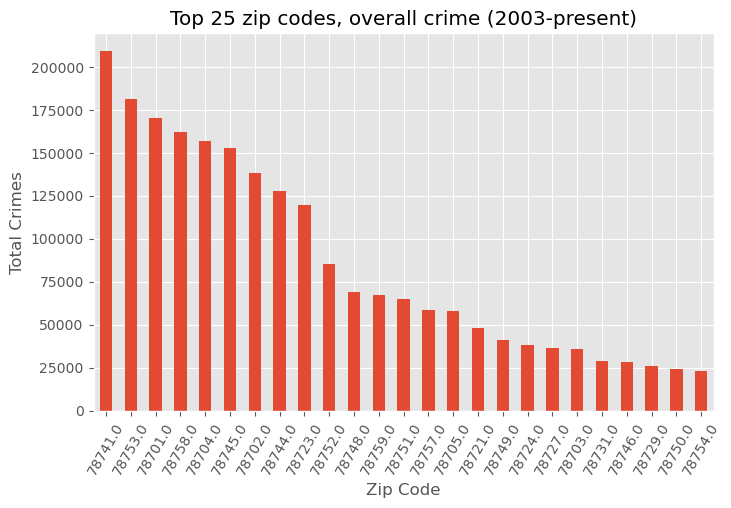

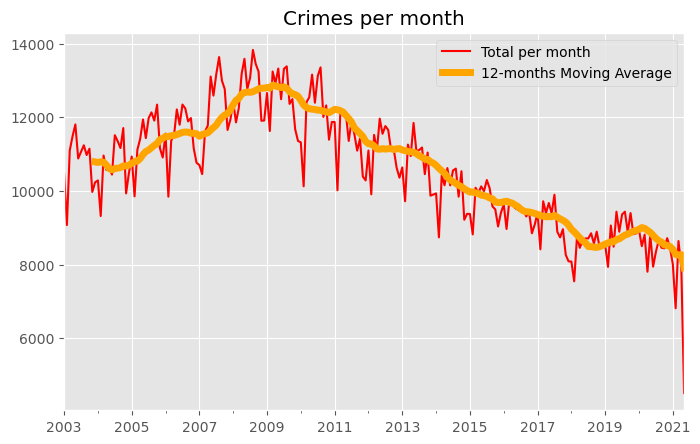

In [32]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
plt.figure(dpi=100)
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5), dpi=100)
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

,highest_offense_description
BURGLARY OF VEHICLE,232457
THEFT,213663
FAMILY DISTURBANCE,182693
CRIMINAL MISCHIEF,129041
ASSAULT W/INJURY-FAM/DATE VIOL,79025
BURGLARY OF RESIDENCE,77636
DWI,70138
PUBLIC INTOXICATION,69000
HARASSMENT,64980
DISTURBANCE - OTHER,62373


,BURGLARY OF VEHICLE,CRIMINAL MISCHIEF,HARASSMENT,ASSAULT W/INJURY-FAM/DATE VIOL,BURGLARY OF RESIDENCE,PUBLIC INTOXICATION,DWI,FAMILY DISTURBANCE,TOTAL
occurred_date_time,,,,,,,,,
2003-01-31,1225,722,293,349,328,341,408,505,4171
2003-02-28,1110,594,309,342,248,354,328,500,3785
2003-03-31,1222,700,363,421,393,450,406,546,4501
2003-04-30,1396,709,353,432,398,385,375,678,4726
2003-05-31,1487,750,345,424,436,451,418,650,4961
...,...,...,...,...,...,...,...,...,...
2021-01-31,360,432,256,256,128,55,169,815,2471
2021-02-28,308,338,167,245,118,62,130,812,2180
2021-03-31,432,429,194,259,154,75,179,876,2598


<Figure size 432x288 with 0 Axes>

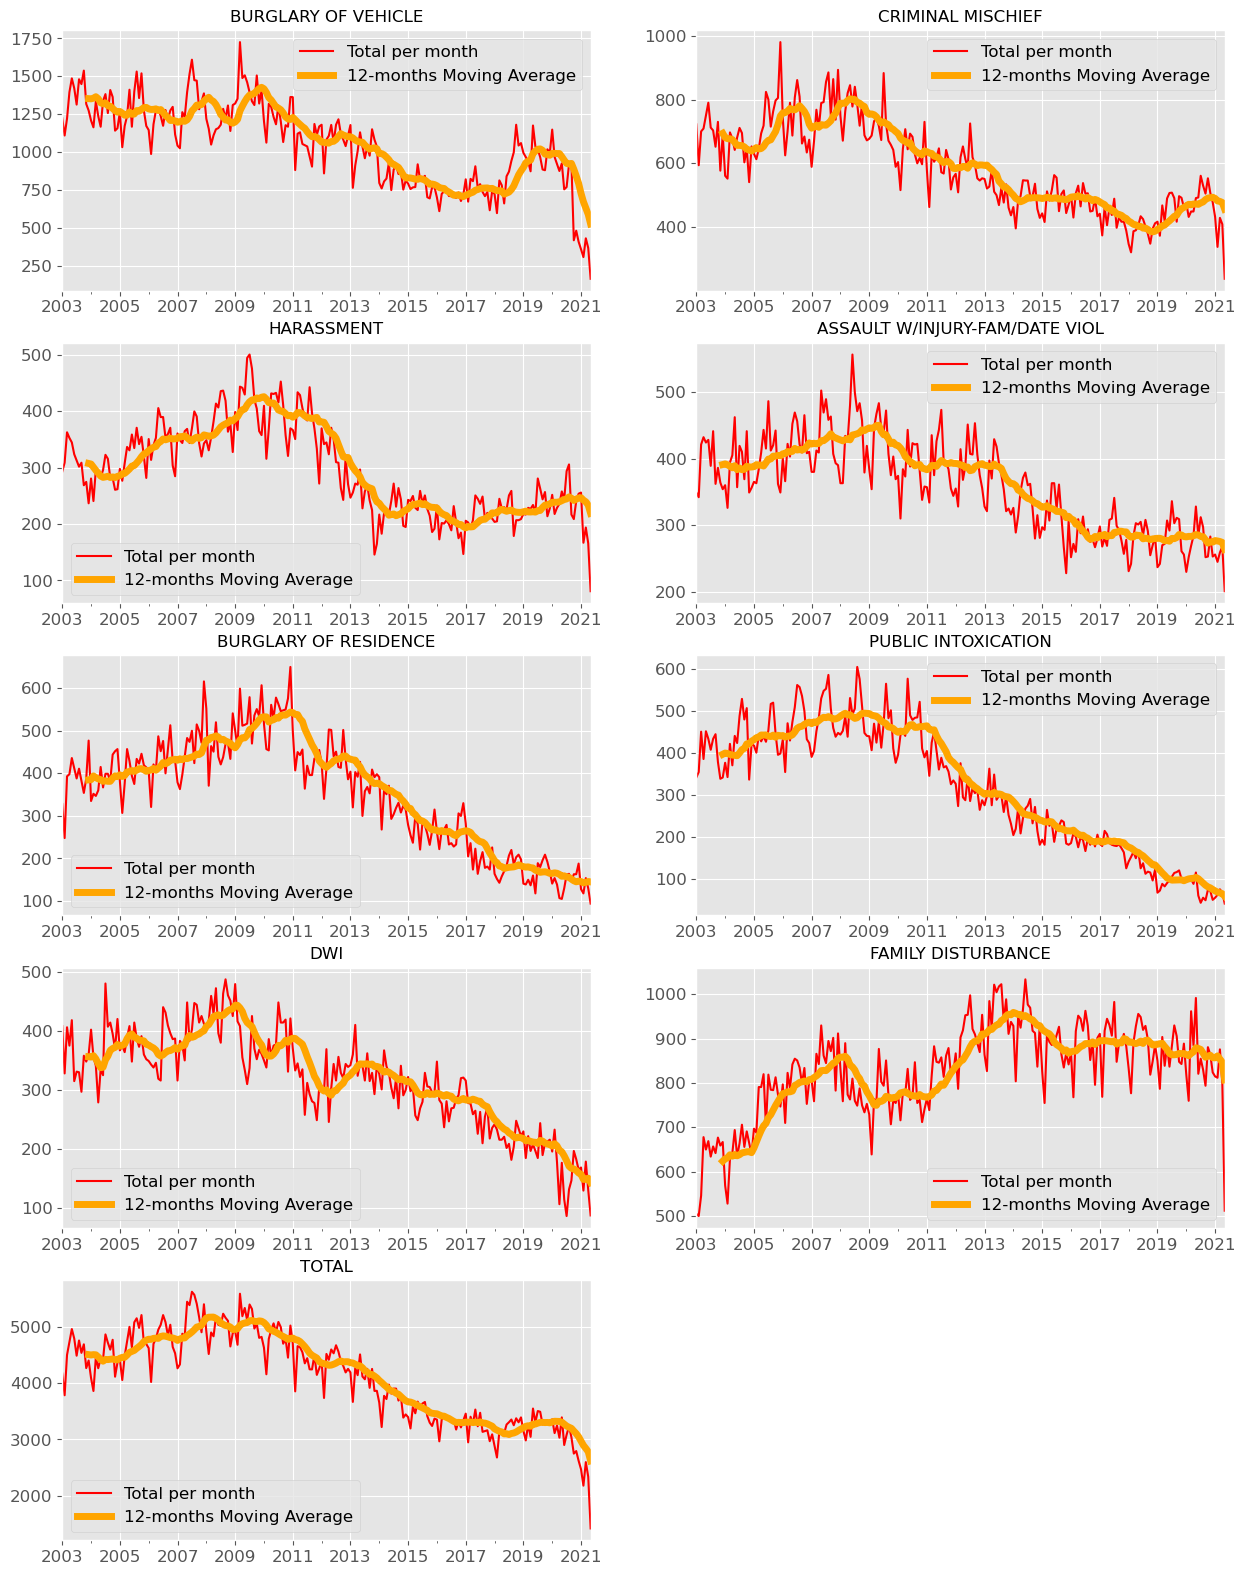

In [33]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20), dpi=100)

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

,highest_offense_description
PUBLIC INTOXICATION,17206
THEFT,15951
BURGLARY OF VEHICLE,9331
WARRANT ARREST NON TRAFFIC,8968
DWI,8355
ASSAULT WITH INJURY,7636
VIOL CITY ORDINANCE - OTHER,6192
POSS OF DRUG PARAPHERNALIA,6095
CRIMINAL MISCHIEF,5911
CRIMINAL TRESPASS,3958


,highest_offense_description
PUBLIC INTOXICATION,0.101117
THEFT,0.093741
BURGLARY OF VEHICLE,0.054837
WARRANT ARREST NON TRAFFIC,0.052703
DWI,0.049101
ASSAULT WITH INJURY,0.044875
VIOL CITY ORDINANCE - OTHER,0.036389
POSS OF DRUG PARAPHERNALIA,0.035819
CRIMINAL MISCHIEF,0.034738
CRIMINAL TRESPASS,0.023260


<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

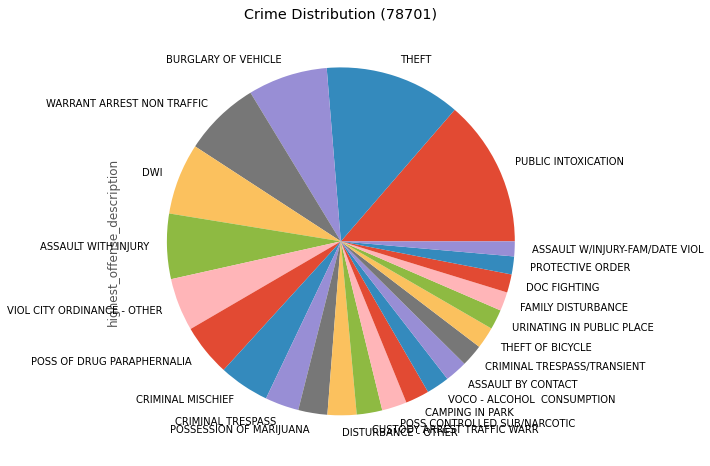

In [11]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame())
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

,highest_offense_description
THEFT,17277
BURGLARY OF VEHICLE,16026
FAMILY DISTURBANCE,14910
CRIMINAL MISCHIEF,9571
THEFT BY SHOPLIFTING,7707
ASSAULT W/INJURY-FAM/DATE VIOL,7269
BURGLARY OF RESIDENCE,6115
DWI,5086
DISTURBANCE - OTHER,4835
CUSTODY ARREST TRAFFIC WARR,4352


----------------------------------


,highest_offense_description
THEFT,0.095195
BURGLARY OF VEHICLE,0.088302
FAMILY DISTURBANCE,0.082153
CRIMINAL MISCHIEF,0.052735
THEFT BY SHOPLIFTING,0.042465
ASSAULT W/INJURY-FAM/DATE VIOL,0.040052
BURGLARY OF RESIDENCE,0.033693
DWI,0.028023
DISTURBANCE - OTHER,0.026640
CUSTODY ARREST TRAFFIC WARR,0.023979


<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

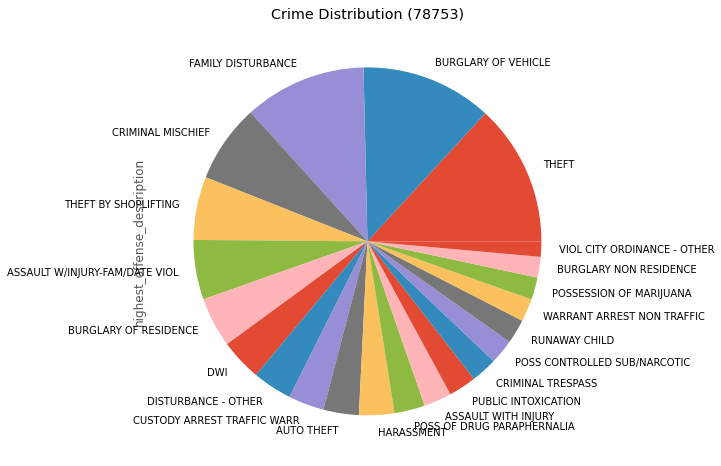

In [12]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_53_off.to_frame())
print("----------------------------------")
display(df_53.highest_offense_description.value_counts(normalize=True).head(22).to_frame())
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

,highest_offense_description
FAMILY DISTURBANCE,20642
BURGLARY OF VEHICLE,19926
THEFT,15734
CRIMINAL MISCHIEF,11146
ASSAULT W/INJURY-FAM/DATE VIOL,9708
BURGLARY OF RESIDENCE,8932
PUBLIC INTOXICATION,6402
CUSTODY ARREST TRAFFIC WARR,6011
DWI,5702
HARASSMENT,5592


----------------------------------


,highest_offense_description
FAMILY DISTURBANCE,0.098684
BURGLARY OF VEHICLE,0.095261
THEFT,0.075220
CRIMINAL MISCHIEF,0.053286
ASSAULT W/INJURY-FAM/DATE VIOL,0.046411
BURGLARY OF RESIDENCE,0.042701
PUBLIC INTOXICATION,0.030606
CUSTODY ARREST TRAFFIC WARR,0.028737
DWI,0.027260
HARASSMENT,0.026734


<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

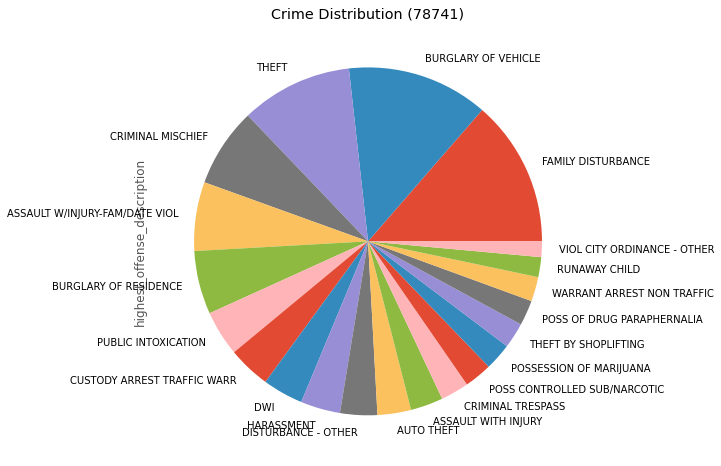

In [13]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
display(df_41_off.to_frame())
print("----------------------------------")
display(df_41.highest_offense_description.value_counts(normalize=True).head(21).to_frame())
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

,highest_offense_description
FAMILY DISTURBANCE,15184
BURGLARY OF VEHICLE,14797
THEFT,13669
CRIMINAL MISCHIEF,8621
BURGLARY OF RESIDENCE,5894
ASSAULT W/INJURY-FAM/DATE VIOL,5813
HARASSMENT,5179
DISTURBANCE - OTHER,4576
DWI,4452
PUBLIC INTOXICATION,4012


----------------------------------


,highest_offense_description
FAMILY DISTURBANCE,0.099316
BURGLARY OF VEHICLE,0.096785
THEFT,0.089406
CRIMINAL MISCHIEF,0.056388
BURGLARY OF RESIDENCE,0.038552
ASSAULT W/INJURY-FAM/DATE VIOL,0.038022
HARASSMENT,0.033875
DISTURBANCE - OTHER,0.029931
DWI,0.029120
PUBLIC INTOXICATION,0.026242


<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

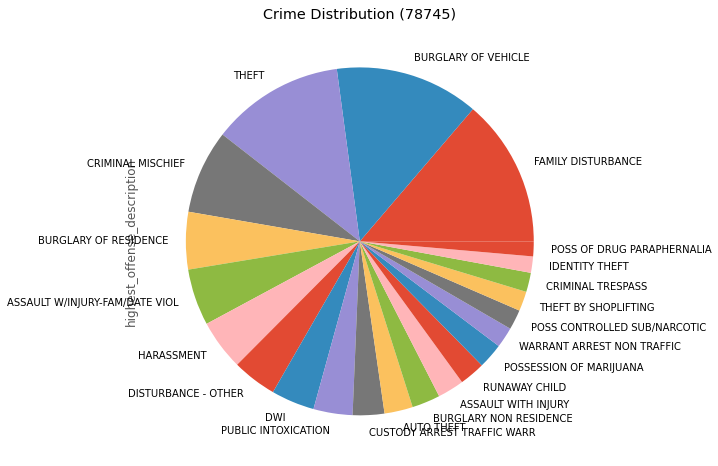

In [14]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
display(df_45_off.to_frame())
print("----------------------------------")
display(df_45.highest_offense_description.value_counts(normalize=True).head(22).to_frame())
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

,highest_offense_description
BURGLARY OF VEHICLE,8699
THEFT,5660
CRIMINAL MISCHIEF,5010
THEFT OF BICYCLE,3537
PUBLIC INTOXICATION,2633
BURGLARY OF RESIDENCE,2135
WARRANT ARREST NON TRAFFIC,1551
CRIMINAL TRESPASS,1372
AUTO THEFT,1366
ASSAULT WITH INJURY,1274


'----------------------------------'

,highest_offense_description
BURGLARY OF VEHICLE,0.150125
THEFT,0.097679
CRIMINAL MISCHIEF,0.086461
THEFT OF BICYCLE,0.061041
PUBLIC INTOXICATION,0.045440
BURGLARY OF RESIDENCE,0.036845
WARRANT ARREST NON TRAFFIC,0.026767
CRIMINAL TRESPASS,0.023678
AUTO THEFT,0.023574
ASSAULT WITH INJURY,0.021986


<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

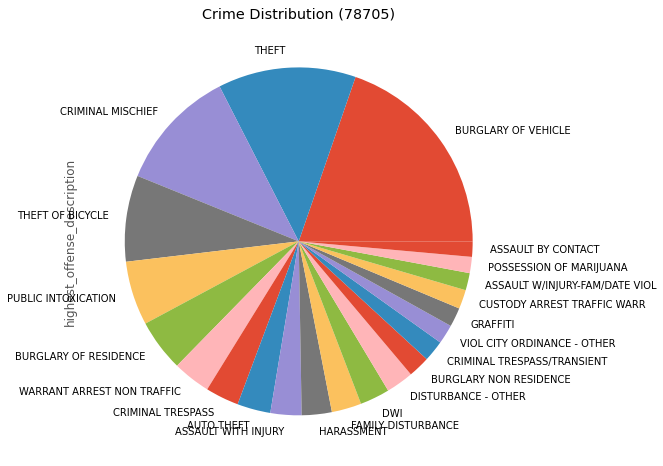

In [15]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off.to_frame())
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22).to_frame())
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

,highest_offense_description
BURGLARY OF VEHICLE,5431
THEFT,5111
THEFT BY SHOPLIFTING,2561
CRIMINAL MISCHIEF,1279
DWI,888
FAMILY DISTURBANCE,775
VIOL CITY ORDINANCE - OTHER,652
HARASSMENT,636
AUTO THEFT,612
BURGLARY OF RESIDENCE,524


,highest_offense_description
BURGLARY OF VEHICLE,0.190823
THEFT,0.179579
THEFT BY SHOPLIFTING,0.089983
CRIMINAL MISCHIEF,0.044939
DWI,0.031201
FAMILY DISTURBANCE,0.027230
VIOL CITY ORDINANCE - OTHER,0.022909
HARASSMENT,0.022346
AUTO THEFT,0.021503
BURGLARY OF RESIDENCE,0.018411


<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

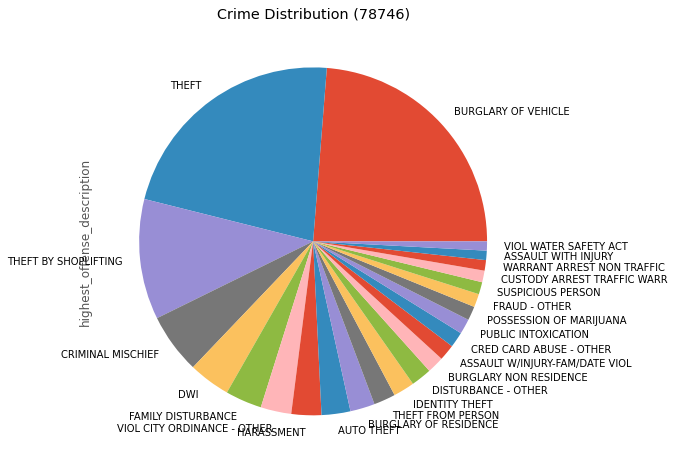

In [16]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off.to_frame())
display(df_46.highest_offense_description.value_counts(normalize=True).head(24).to_frame())
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [17]:
# Creating separate dataframes for violent crime & murder rates

"""First, I wanted to update the naming of the offense types to make everything more presentable, 
including combining 'CAPITAL MURDER' with 'MURDER'."""

df.highest_offense_description = df.highest_offense_description.replace(
    {
        "CAPITAL MURDER": "MURDER",
        "AGG ROBBERY/DEADLY WEAPON": "ARMED ROBBERY",
        "AGG ASSAULT": "AGGRAVATED ASSAULT",
    }
)

df_viol = df.query(
    'highest_offense_description == ["AGGRAVATED ASSAULT", "ARMED ROBBERY", "RAPE", "MURDER"]'
)
df_viol_mur = df_viol[df_viol.highest_offense_description == "MURDER"]
df_agg_asslt = df_viol[df_viol.highest_offense_description == "AGGRAVATED ASSAULT"]
df_agg_robbery = df_viol[df_viol.highest_offense_description == "ARMED ROBBERY"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]
df_viol_mur_21 = df_viol_mur[df_viol_mur.year == 2021]

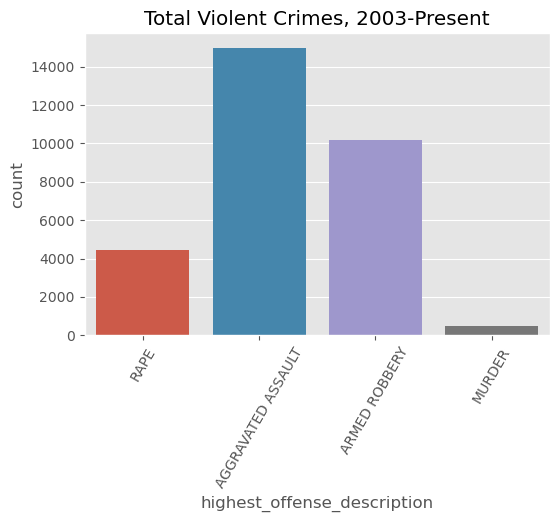

78741.0    0.130589
78753.0    0.099120
78758.0    0.094606
78701.0    0.074976
78723.0    0.074006
78702.0    0.073738
78745.0    0.057787
78752.0    0.052336
78744.0    0.051801
78704.0    0.048223
78721.0    0.027857
78724.0    0.024412
78705.0    0.021603
78757.0    0.020600
78748.0    0.017590
78751.0    0.017022
78759.0    0.013912
78722.0    0.009430
78754.0    0.008528
78727.0    0.007926
78749.0    0.007792
78617.0    0.007658
78729.0    0.007223
78750.0    0.005652
78731.0    0.005183
Name: zip_code, dtype: float64

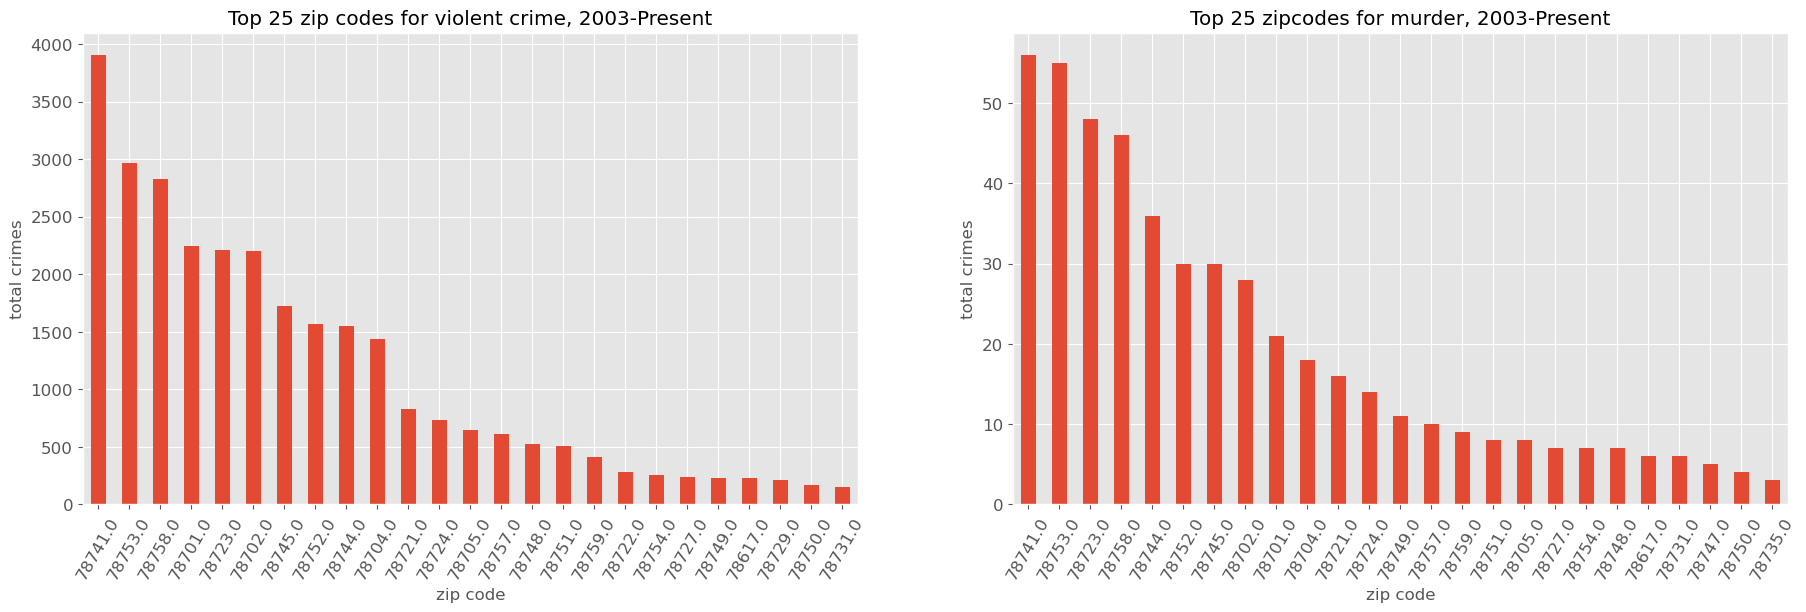

highest_offense_description,AGGRAVATED ASSAULT,ARMED ROBBERY,MURDER,RAPE
zip_code,,,,
78610.0,1,0,0,1
78613.0,15,11,1,8
78617.0,124,62,6,37
78621.0,1,0,0,0
78634.0,1,0,0,0
78652.0,3,0,0,0
78653.0,10,3,1,1
78660.0,65,31,2,19
78664.0,3,0,0,0


<Figure size 432x288 with 0 Axes>

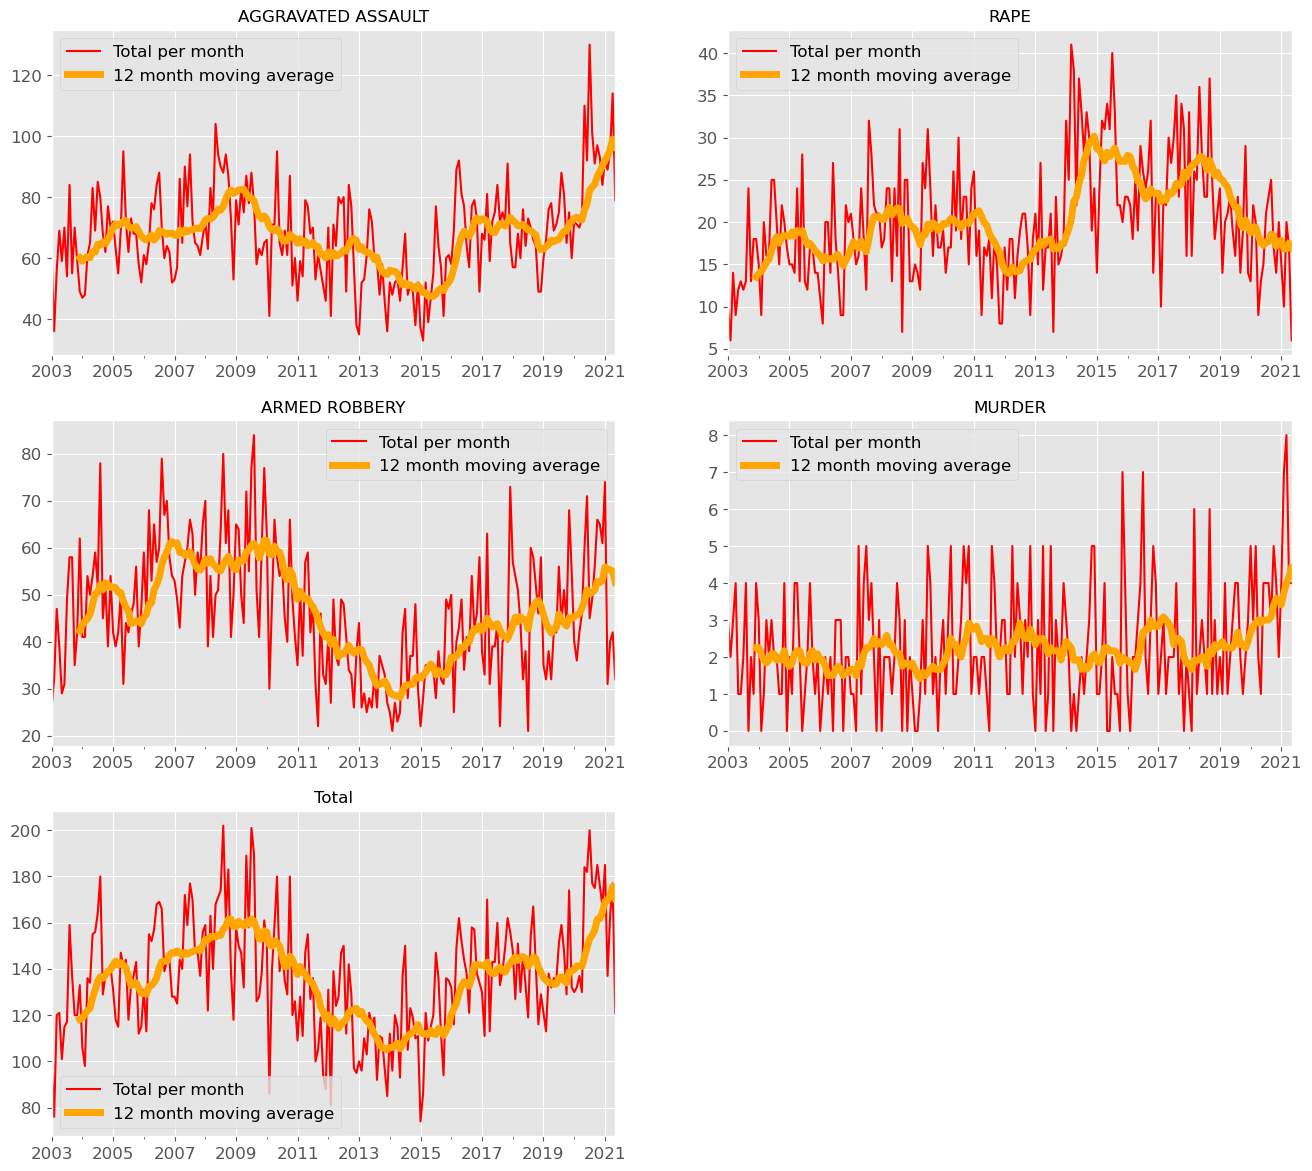

In [30]:
plt.figure(dpi=100)
plt.xticks(rotation="60")
sb.countplot(df_viol.highest_offense_description, data=df_viol).set_title(
    "Total Violent Crimes, 2003-Present"
)
plt.show()

display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2, dpi=100)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGGRAVATED ASSAULT"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["AGGRAVATED ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25), dpi=100)

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1


viol_freq.to_csv("viol_freq.csv")
mur_freq.to_csv("mur_freq.csv")

Currently, 78741 shares 13.07% of violent crime, followed by 78753, sharing 9.92%.


### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

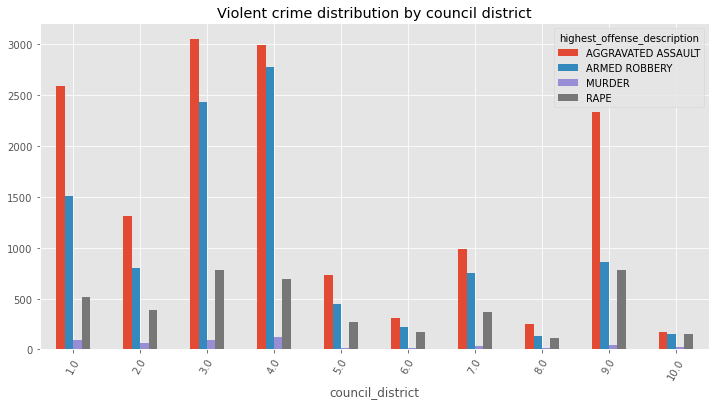

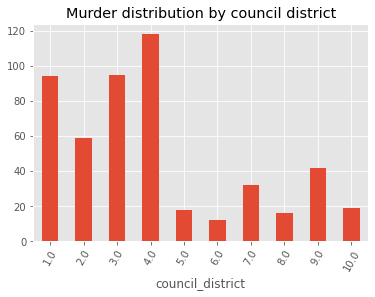

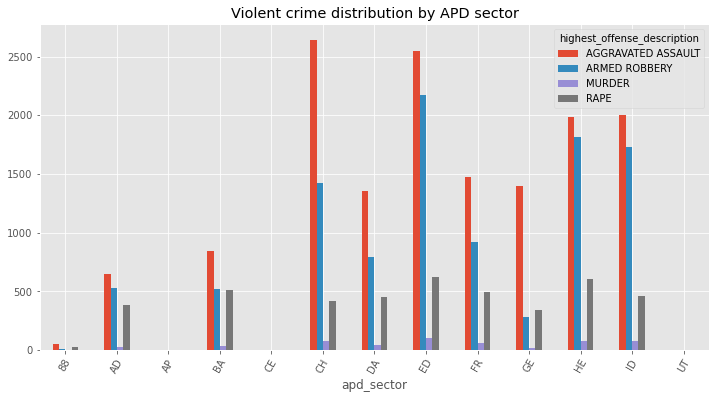

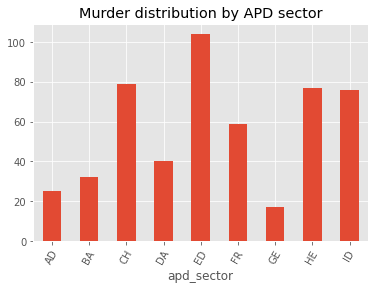

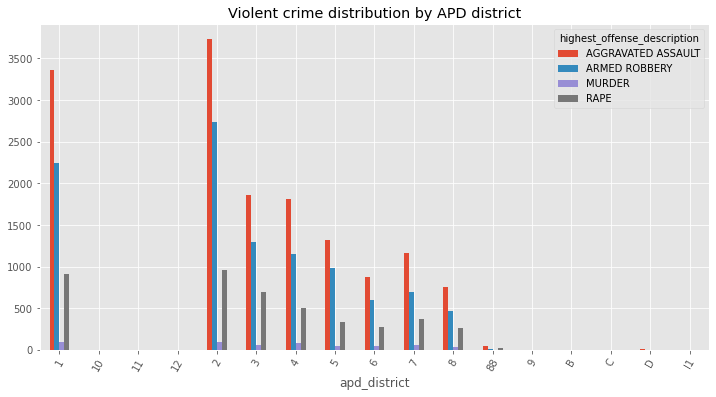

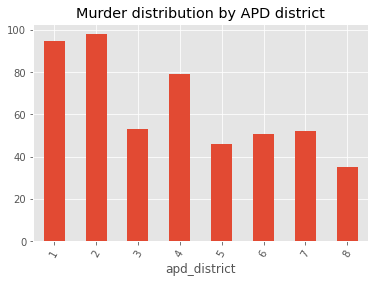

In [19]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(rot=60, title="Murder distribution by council district", legend=False)
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    rot=60, title="Murder distribution by APD sector", legend=False
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    rot=60, title="Murder distribution by APD district", legend=False
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGGRAVATED ASSAULT,ARMED ROBBERY,MURDER,RAPE
location_type,,,,
ABANDONED/CONDEMNED STRUCTURE,14,7,1,4
AMUSEMENT PARK,0,2,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,1
BANKS / SAVINGS & LOAN,5,134,1,1
BAR / NIGHT CLUB,673,46,10,79
CAMP / CAMPGROUND,25,2,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,21,5,1,7


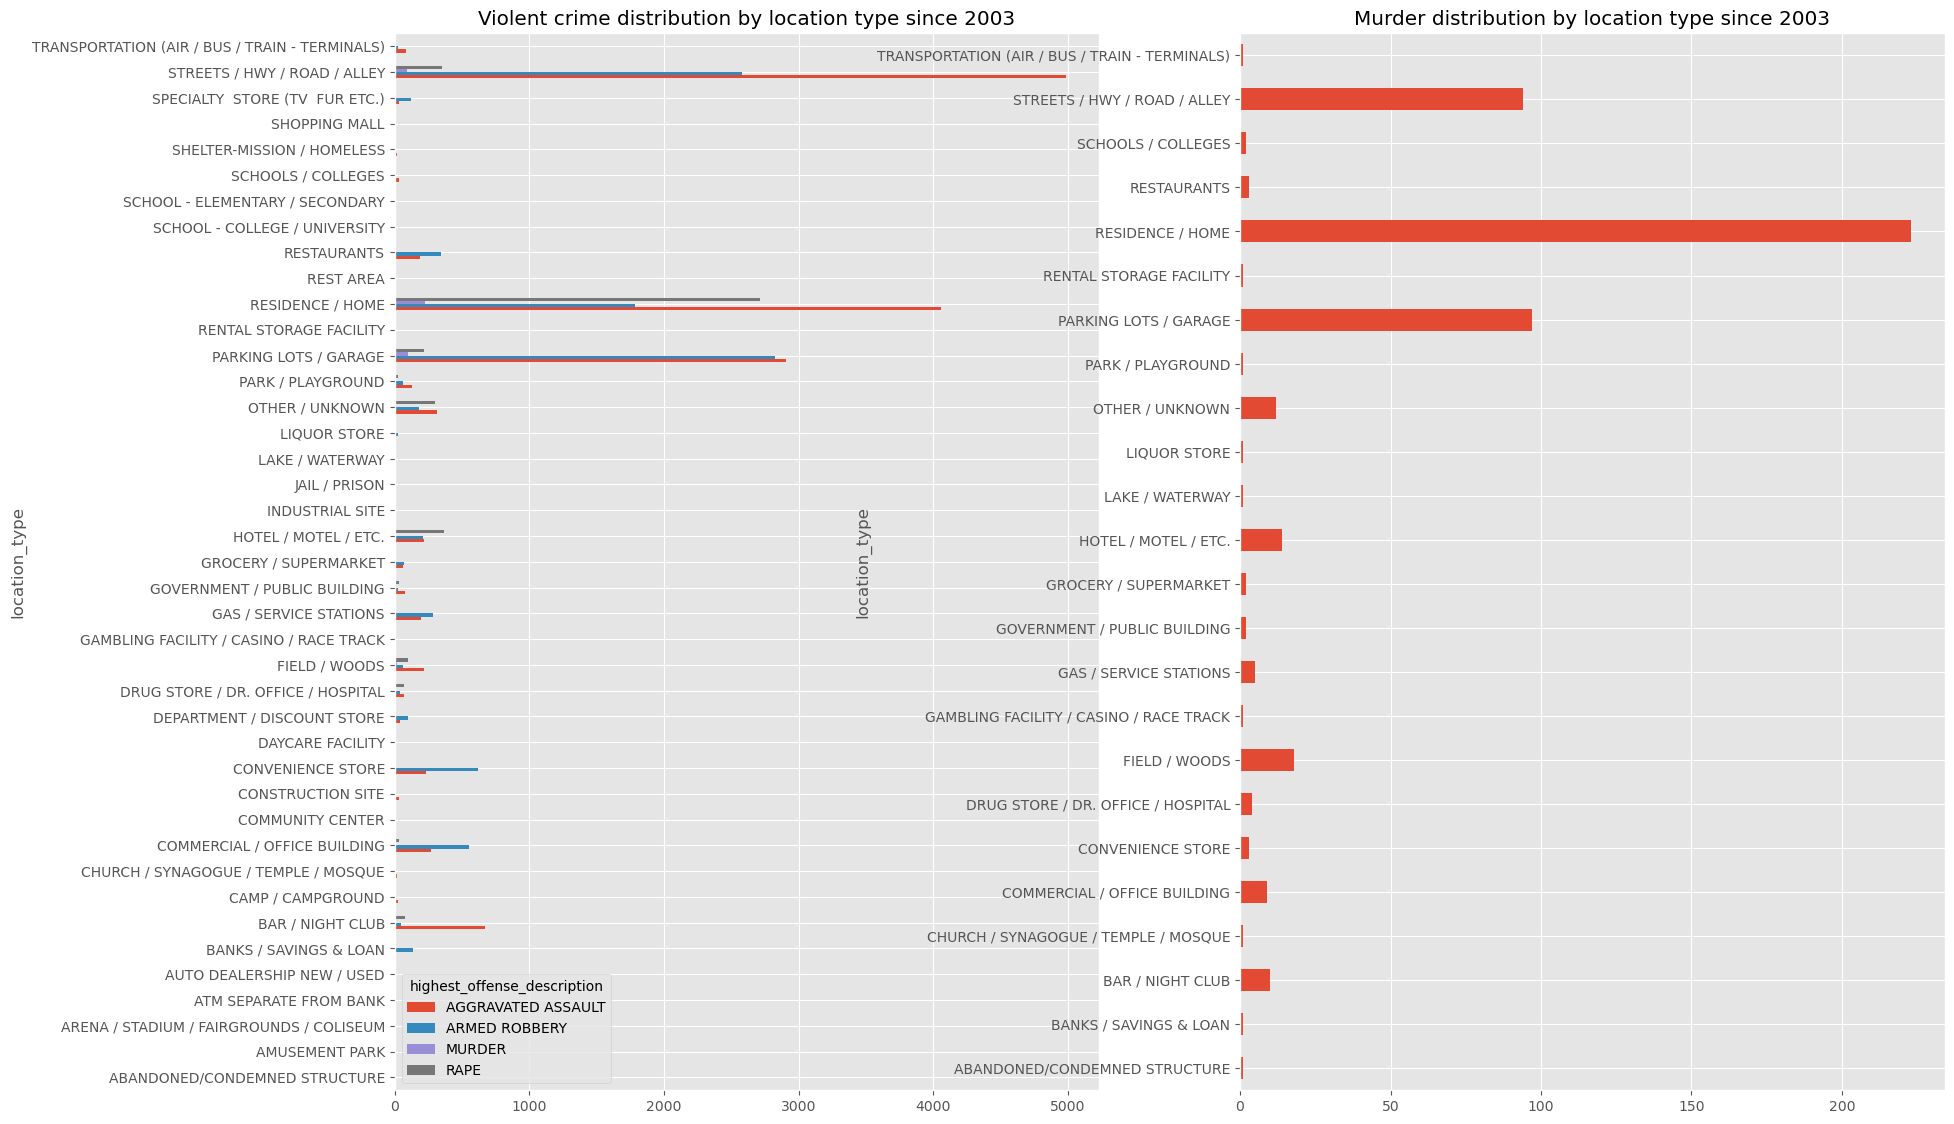

In [28]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2, dpi=100)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003", ax=axs[0],
)
mur_loc.plot.barh(
    title="Murder distribution by location type since 2003", legend=False, ax=axs[1]
)
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [21]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [22]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [23]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [24]:
df.address.value_counts().head(50).to_frame()

,address
4110 GUADALUPE ST,11670
1030 NORWOOD PARK BLVD,9249
2901 S CAPITAL OF TEXAS HWY NB,8151
3600 PRESIDENTIAL BLVD,7402
500 E 7TH ST,6130
1000 E 41ST ST,5847
3708 S 2ND ST,5264
2508 E RIVERSIDE DR,4847
11200 LAKELINE MALL DR,4509
9300 S IH 35 SVRD SB,4089


In [25]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13).to_frame()

,address
500 E 7TH ST,84
9515 N LAMAR BLVD,67
1700 BURTON DR,63
6409 SPRINGDALE RD,59
00 BLOCK UNKNOWN,59
9601 MIDDLE FISKVILLE RD,58
900 BLOCK E 32ND ST,55
1071 CLAYTON LN,55
1030 NORWOOD PARK BLVD,53
9200 NORTH PLZ,53


In [26]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30).to_frame()

,address
8610 N LAMAR BLVD,3
6409 SPRINGDALE RD,3
8800 N IH 35 SVRD SB,3
6407 SPRINGDALE RD,3
4700 E RIVERSIDE DR,3
605 MASTERSON PASS,2
6118 FAIRWAY ST,2
1137 GUNTER ST,2
11105 N IH 35 SVRD NB,2
8912 N LAMAR BLVD,2


In [27]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")
df_viol_mur_21.to_csv("df_viol_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")